## Logistic Regression Using Scikit-Learrn
This is the implementation of Logistic Regression by using the scikit learn library module and using the required parameter tuning to get the best model accuracy.We have also used the required scikit-learn libraries to preprocess the data and hence implemented the model's on them.

We have also showed the diffence in using different values for the parameter in the model and hence showed that how the regularization parameter affects the different model weights to achieve better generalization and hence we can use the best weights henceforth.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from Decision_Boundary import plot_decision_boundary

### Preprocessing the Data

In [3]:
iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 1,test_size = 0.3,stratify = y)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

### Training the Model

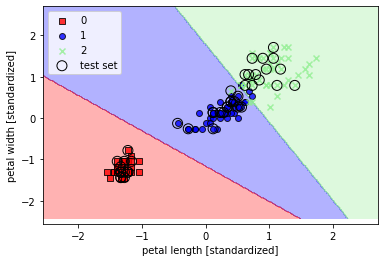

array([2, 0, 0])

In [7]:
lr = LogisticRegression(C=100.0,random_state = 1)
lr.fit(X_train_std,y_train)
plot_decision_boundary(X_combined_std,y_combined,classifier = lr,test_idx= range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.show()
lr.predict_proba(X_test_std[:3,:])
lr.predict(X_test_std[:3,:])

### Parameter Tuning
Here we show how the regularization parameter affects the weights of the model to achieve better performance and hence achieves better generalization accuracy.

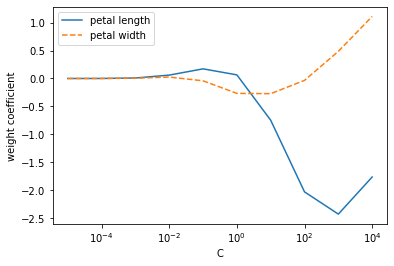

In [8]:
weights , params = [] , []
for c in np.arange(-5,5):
    lr = LogisticRegression(C = 10.**c,random_state = 1)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params,weights[:,0],label = 'petal length')
plt.plot(params,weights[:,1],linestyle = '--',label = 'petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()